# Análisis de factores que inciden en la actividad delictiva


**Analizar la evolución y explorar el comportamiento de cada delito vs PIBE**


Importamos la base de datos:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [106]:
np.set_printoptions(precision = 2)

En esta sección el análisis se enfocará en analizar la evolución y características de las variables de:
Pib estatal promedio  para cada una de las entidades federativas, durante el periodo 2015-2019.
Para ello, se trabajará con un subcojunto de la base de datos original que contenga solo las variables de interés, y a la cual se le aplicarán las manipulaciones necesarias para el análisis.

In [4]:
base = pd.read_csv('base_final.csv')

In [5]:
base.columns

Index(['ao', 'clave_ent', 'edo', 'homicidio', 'robocasa', 'robocalle',
       'robocarro', 'extorsion', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle',
       'tasa_rcarro', 'tasa_extor', 'desocupa', 'edad15a24', 'edad25a34',
       'edad35a44', 'edad45mas', 'pob_tot', 'pibe', 'ingreso', 'pob_ext',
       'pobreza'],
      dtype='object')

In [103]:
df= base[['ao','clave_ent', 'edo', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle', 'tasa_rcarro', 'tasa_extor', 'pibe']]

In [88]:
df.describe()

,ao,clave_ent,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,pibe
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02
mean,2017.000000,16.500000,34.348250,92.510375,51.655312,136.961437,4.918187,5.391530e+05
std,1.418654,9.262082,20.720682,87.032577,71.779046,93.537817,4.970113,5.618525e+05
min,2015.000000,1.000000,3.900000,6.520000,0.000000,12.530000,0.000000,9.558523e+04
25%,2016.000000,8.750000,20.145000,33.562500,7.260000,73.267500,1.200000,2.283873e+05
50%,2017.000000,16.500000,27.825000,65.875000,24.480000,127.375000,3.835000,3.835130e+05
75%,2018.000000,24.250000,42.885000,116.817500,51.412500,169.992500,6.922500,5.778418e+05
max,2019.000000,32.000000,105.540000,389.280000,371.640000,586.220000,30.100000,3.128248e+06


In [10]:
i = df[(df.ao == 2019)].index

df.head()

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,pibe
0,2015,1,Aguascalientes,15.84,189.59,131.70,149.79,198220.6406
1,2016,1,Aguascalientes,17.19,181.43,99.83,229.47,211672.4688
2,2017,1,Aguascalientes,18.75,241.83,141.66,263.41,216705.5625
3,2018,1,Aguascalientes,20.28,240.36,158.76,237.07,224807.4688
4,2019,1,Aguascalientes,19.00,199.02,125.76,169.49,223622.4844


In [11]:
aos=["2015","2016","2017","2018", '2019']
aos

['2015', '2016', '2017', '2018', '2019']

In [12]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [24]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=df.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)
    

In [25]:
## mostramos ejemplo de un Estado en particular
ent[1]

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,pibe
0,2015,1,Aguascalientes,15.84,189.59,131.70,149.79,198220.6406
1,2016,1,Aguascalientes,17.19,181.43,99.83,229.47,211672.4688
2,2017,1,Aguascalientes,18.75,241.83,141.66,263.41,216705.5625
3,2018,1,Aguascalientes,20.28,240.36,158.76,237.07,224807.4688
4,2019,1,Aguascalientes,19.00,199.02,125.76,169.49,223622.4844


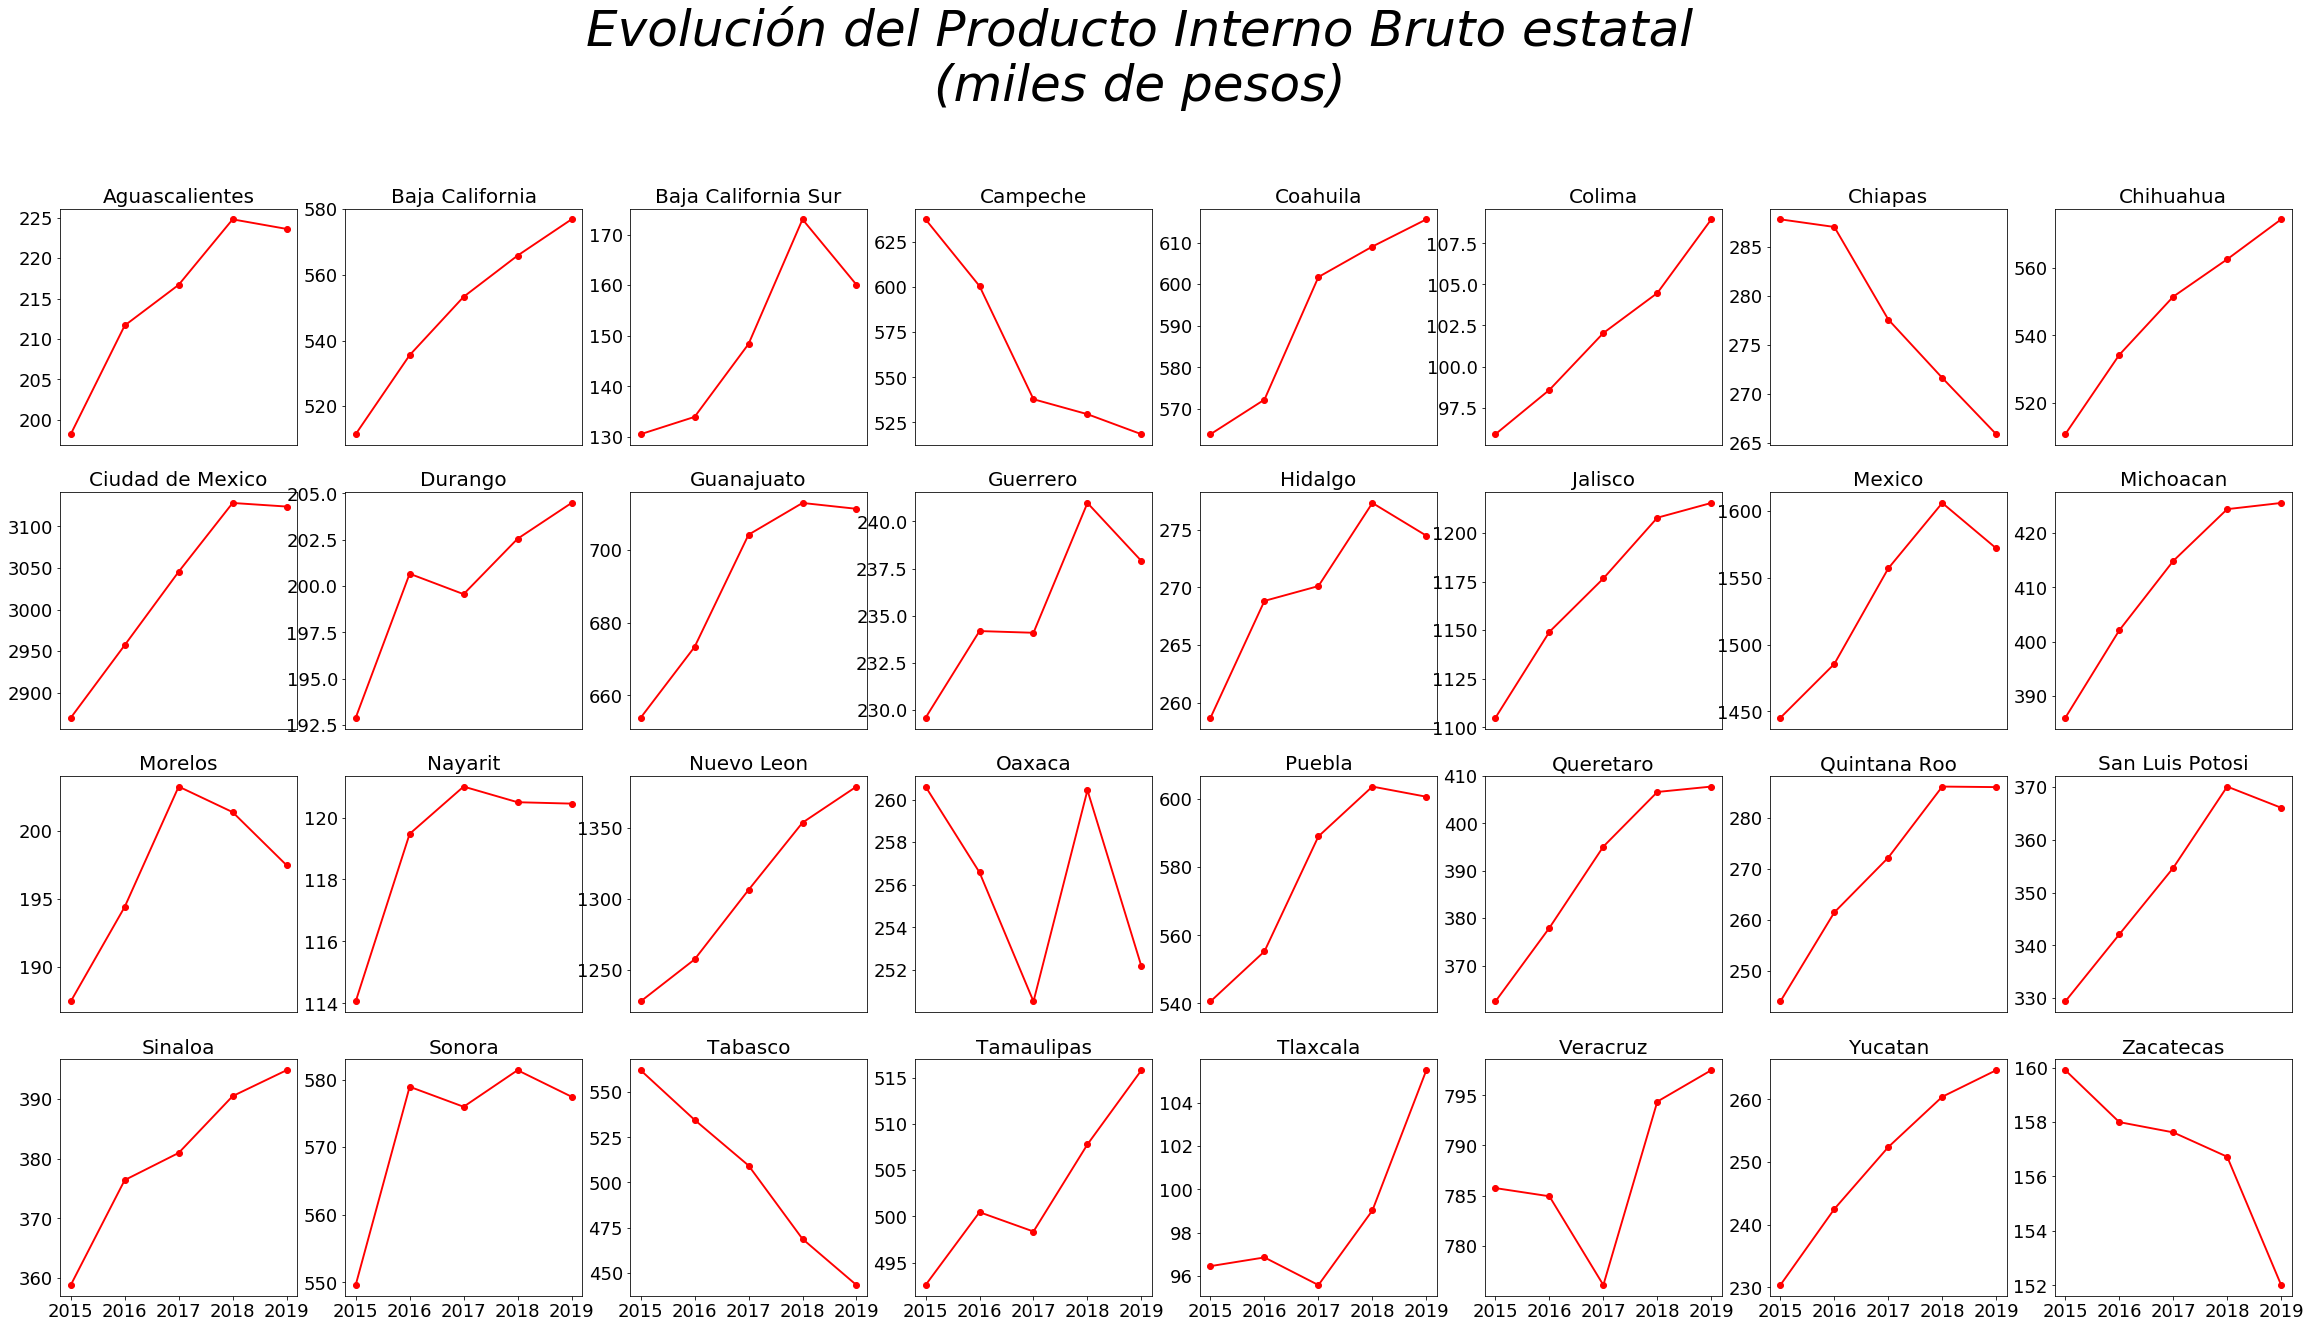

In [48]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].pibe/1000, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del Producto Interno Bruto estatal\n(miles de pesos)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Se puede apreciar que el PIB en cada estado tuvo una variación.
Si comparamos 2015 a 2020 encontramos que en 27 entidad des hgubo una mejora del PIB estatal respecto de 2015.

Las entidades que por el contrario terminaron con un PIB peor que en 2015 fueron:
Campeche
Chiapas
Oaxaca
Tabasco
Zacatecas


A continuación, analizaremos el comportamiento de cada variable por entidad. Para ello, calculamos el **promedio** observado en el periodo:

Utilizando el promedio de cada variable durante los años 2015-2019, graficamos:

In [36]:
dfprom=df.groupby(["clave_ent","edo"]).mean()
dfprom.head()

,,ao,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,pibe
clave_ent,edo,,,,,,
1,Aguascalientes,2017,18.212,210.446,131.542,209.846,215005.72502
2,Baja California,2017,65.238,267.328,160.692,468.866,548634.64376
3,Baja California Sur,2017,41.934,336.008,6.680,175.204,149198.48750
4,Campeche,2017,15.068,11.978,6.410,53.902,564835.56250
5,Coahuila,2017,15.666,80.414,37.396,32.298,592507.00000


In [39]:

#creamos dataframe auxiliar para ordenar los valores
df_pibe = dfprom.sort_values("pibe",ascending=False)
df_pibe.head()

,,ao,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,pibe
clave_ent,edo,,,,,,
9,Ciudad de Mexico,2017,19.844,72.670,193.094,137.852,3.024948e+06
15,Mexico,2017,18.734,44.622,88.728,283.246,1.533064e+06
19,Nuevo Leon,2017,22.274,55.586,28.826,39.976,1.305081e+06
14,Jalisco,2017,27.906,93.924,153.276,228.094,1.170804e+06
30,Veracruz,2017,24.166,26.990,18.900,94.444,7.877266e+05


In [41]:
df_pibe["nombre_ent"] = df_pibe.index
df_pibe.head()

,,ao,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,pibe,nombre_ent
clave_ent,edo,,,,,,,
9,Ciudad de Mexico,2017,19.844,72.670,193.094,137.852,3.024948e+06,"(9, Ciudad de Mexico)"
15,Mexico,2017,18.734,44.622,88.728,283.246,1.533064e+06,"(15, Mexico)"
19,Nuevo Leon,2017,22.274,55.586,28.826,39.976,1.305081e+06,"(19, Nuevo Leon)"
14,Jalisco,2017,27.906,93.924,153.276,228.094,1.170804e+06,"(14, Jalisco)"
30,Veracruz,2017,24.166,26.990,18.900,94.444,7.877266e+05,"(30, Veracruz)"


In [43]:
#variable posicional para eje x
ypos=np.arange(len(df_pibe))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

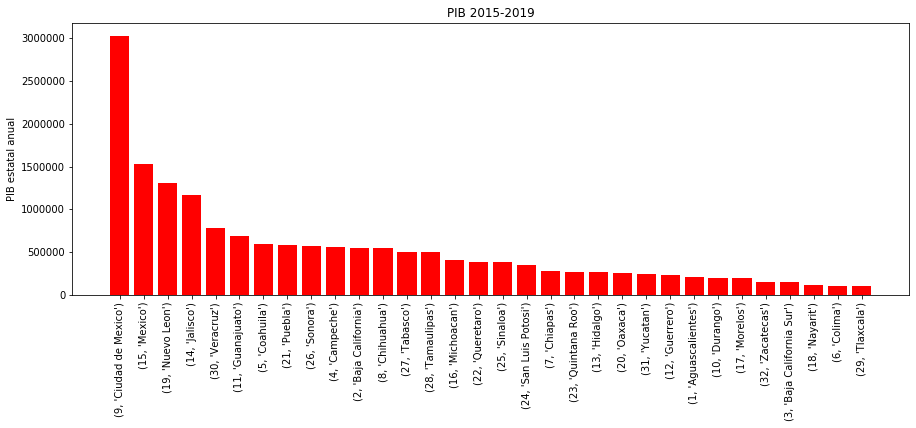

In [52]:
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(ypos,df_pibe['pibe'], color='red')
plt.xticks(ypos,df_pibe["nombre_ent"],rotation=90)
plt.ylabel("PIB estatal anual")
plt.title("PIB 2015-2019")
plt.show()

In [55]:
dfprom["pibe"].describe()

count    3.200000e+01
mean     5.391530e+05
std      5.682886e+05
min      9.868482e+04
25%      2.302634e+05
50%      3.851513e+05
75%      5.739820e+05
max      3.024948e+06
Name: pibe, dtype: float64

El PIB estatal promedio es de aproximadamente de 539,153, sin embargo la mediana es de 385151.3. Si la media es mayor que la mediana, la distribución está sesgada a la derecha.


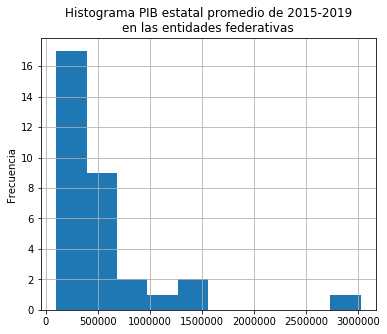

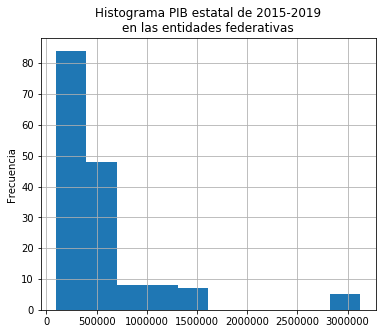

In [71]:
plt.rcParams["figure.figsize"] = [6,5]
dfprom["pibe"].hist(bins=10)
plt.title("Histograma PIB estatal promedio de 2015-2019\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()


df["pibe"].hist(bins=10)
plt.title("Histograma PIB estatal de 2015-2019\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

Observamos que ambas distribuciones son muy parecidas

### Ahora se verá a traves de un scatter plox la relación entre los delitos seleccionados y el PIB estatal

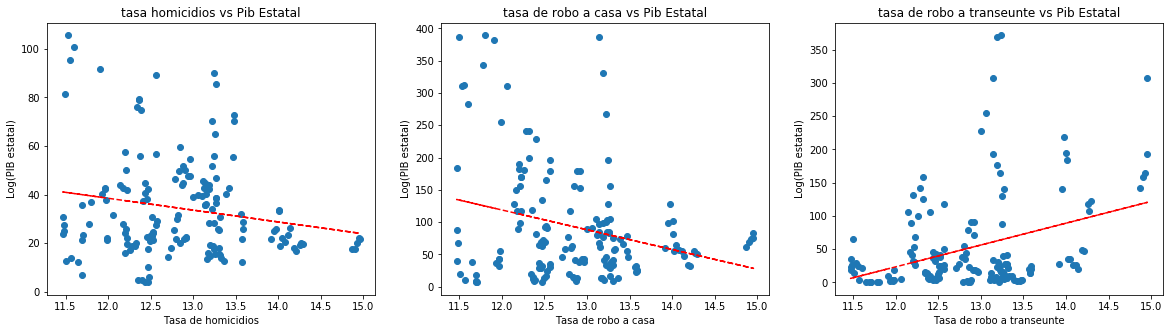

In [86]:

plt.rcParams["figure.figsize"] = [20,5]

plt.subplot(1,3,1)
plt.scatter(np.log(df.pibe), df.tasa_hom)
plt.xlabel("Tasa de homicidios")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa homicidios vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_hom, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")


plt.subplot(1,3,2)
plt.scatter(np.log(df.pibe), df.tasa_rcasa)
plt.xlabel("Tasa de robo a casa")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de robo a casa vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcasa, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.subplot(1,3,3)
plt.scatter(np.log(df.pibe), df.tasa_rcalle)
plt.xlabel("Tasa de robo a transeunte")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de robo a transeunte vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcalle, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.show()


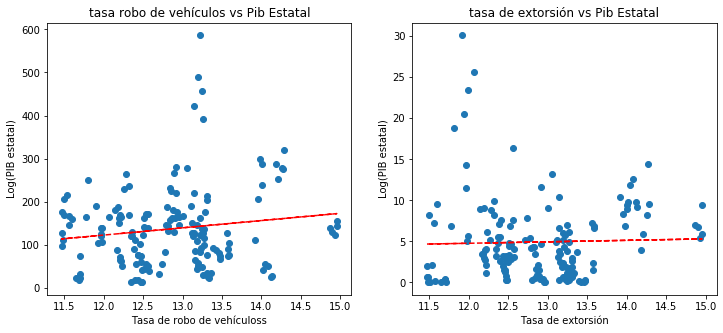

In [94]:
plt.rcParams["figure.figsize"] = [12,5]

plt.subplot(1,2,1)
plt.scatter(np.log(df.pibe), df.tasa_rcarro)
plt.xlabel("Tasa de robo de vehículos")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa robo de vehículos vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcarro, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")


plt.subplot(1,2,2)
plt.scatter(np.log(df.pibe), df.tasa_extor)
plt.xlabel("Tasa de extorsión")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de extorsión vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_extor, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.show()



Se observa que las variables de robo de transeúnte, robo de vehículos, y extorisón están relacionadas de manera positiva con el PIB(estatal) Aunque las últimas

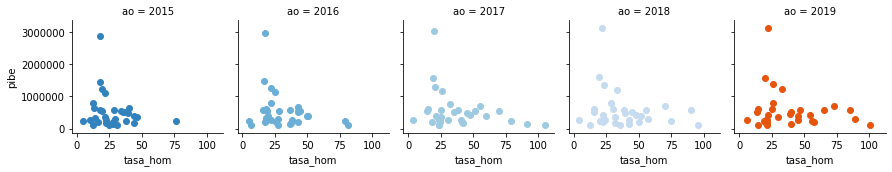

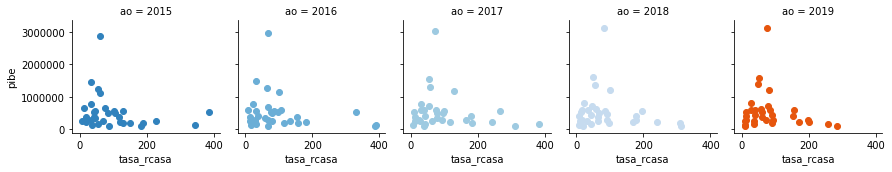

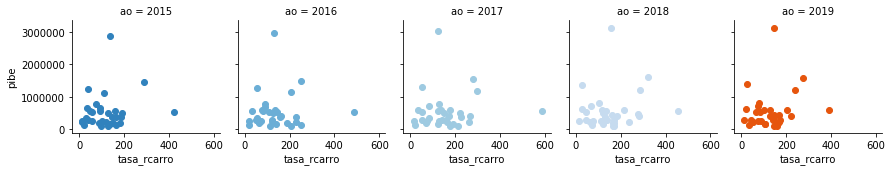

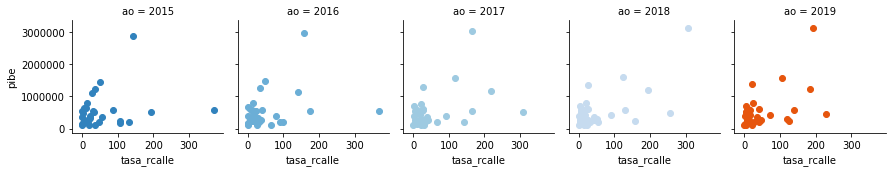

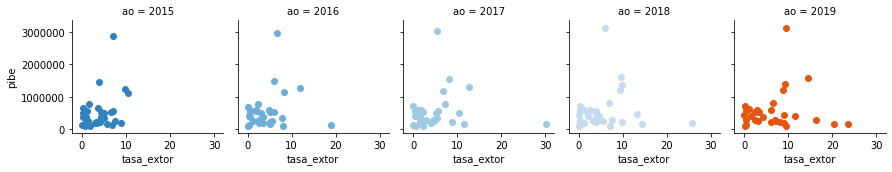

In [110]:
grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_hom', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcasa', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcarro', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcalle', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_extor', 'pibe',  marker="o");




Se puede observar que variables como extorsión, robo a transeunte, robo a casa habitación no cambian mucho con el tiempo, sin embargo la variable que cambió mas fue la tasa de homicidios